In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datosporregion as dpr
from model import SEIRDmodel
import matplotlib.colors as colors

In [123]:
modelo = SEIRDmodel(propInfAislamientoTotal = 0.9, r = 0.85, inicio_red = 25)

In [124]:
y = modelo.simular()

In [125]:
modelo.f

0.09999999999999998

In [126]:
dias = len(y[0])
dias

95

In [127]:
inf = y[[5*i + 2 for i in range(8)]]

In [128]:
df = {}
for i in range(14):
    week = 'semana_{}'.format(i+1)
    df[week] = inf[:, i*7]
    
df['region'] = [i+1 for i in range(8)]

df = pd.DataFrame(df)
    

In [129]:
modelo.P

[2008954, 3087543, 3956978, 3154056, 2523807, 905765, 2683885, 2419664]

In [130]:
import geopandas as gpd

In [131]:
map_df = gpd.read_file('Regionesmap/regiones.shp', encoding = 'latin')

In [132]:
merged = map_df.set_index('region').join(df.set_index('region'))

In [133]:
merged[['semana_{}'.format(i) for i in range(1, 15)]]

,semana_1,semana_2,semana_3,semana_4,semana_5,semana_6,semana_7,semana_8,semana_9,semana_10,semana_11,semana_12,semana_13,semana_14
region,,,,,,,,,,,,,,
1,0.0,0.076922,1.872053,30.618151,380.062299,2057.073600,10185.795442,48804.661685,178628.706170,404876.811723,570461.615833,591491.746650,522602.313297,425178.332966
2,1.0,1.052226,4.980576,52.899998,573.365015,3257.427731,16777.079983,81695.336313,304804.669106,683198.029186,928479.165420,931852.577004,804466.380483,644333.134845
3,0.0,0.072675,1.595745,24.300858,276.946535,1184.078206,4916.590573,22102.188754,83907.285033,242010.039148,512199.035242,786980.458501,929887.149356,921015.199949
4,0.0,0.126286,3.122141,52.101398,646.314405,3318.904232,16477.086885,80772.076593,283720.114119,610472.210346,848367.087107,886461.239820,792803.008672,652517.962148
5,0.0,0.050395,1.268272,21.282984,260.123563,1236.290452,5724.505866,27526.709775,104171.046417,275764.580350,496416.446138,636772.109386,650503.050464,581623.134844
6,0.0,0.018831,0.322515,4.196723,42.280370,142.159228,499.281998,2115.313425,7976.234068,23162.331611,50466.409728,85151.613211,117106.589537,137488.865459
7,1.0,1.184339,8.776175,123.246012,1672.384277,15721.404213,123267.955422,530765.848542,918839.004789,957250.179811,815385.925551,637998.576778,480895.047359,356449.081469
8,1.0,0.946096,2.864198,23.532985,223.554720,922.915946,3695.483842,16063.135459,59720.267718,168504.576782,344985.773247,509967.060398,583065.769733,564015.499237


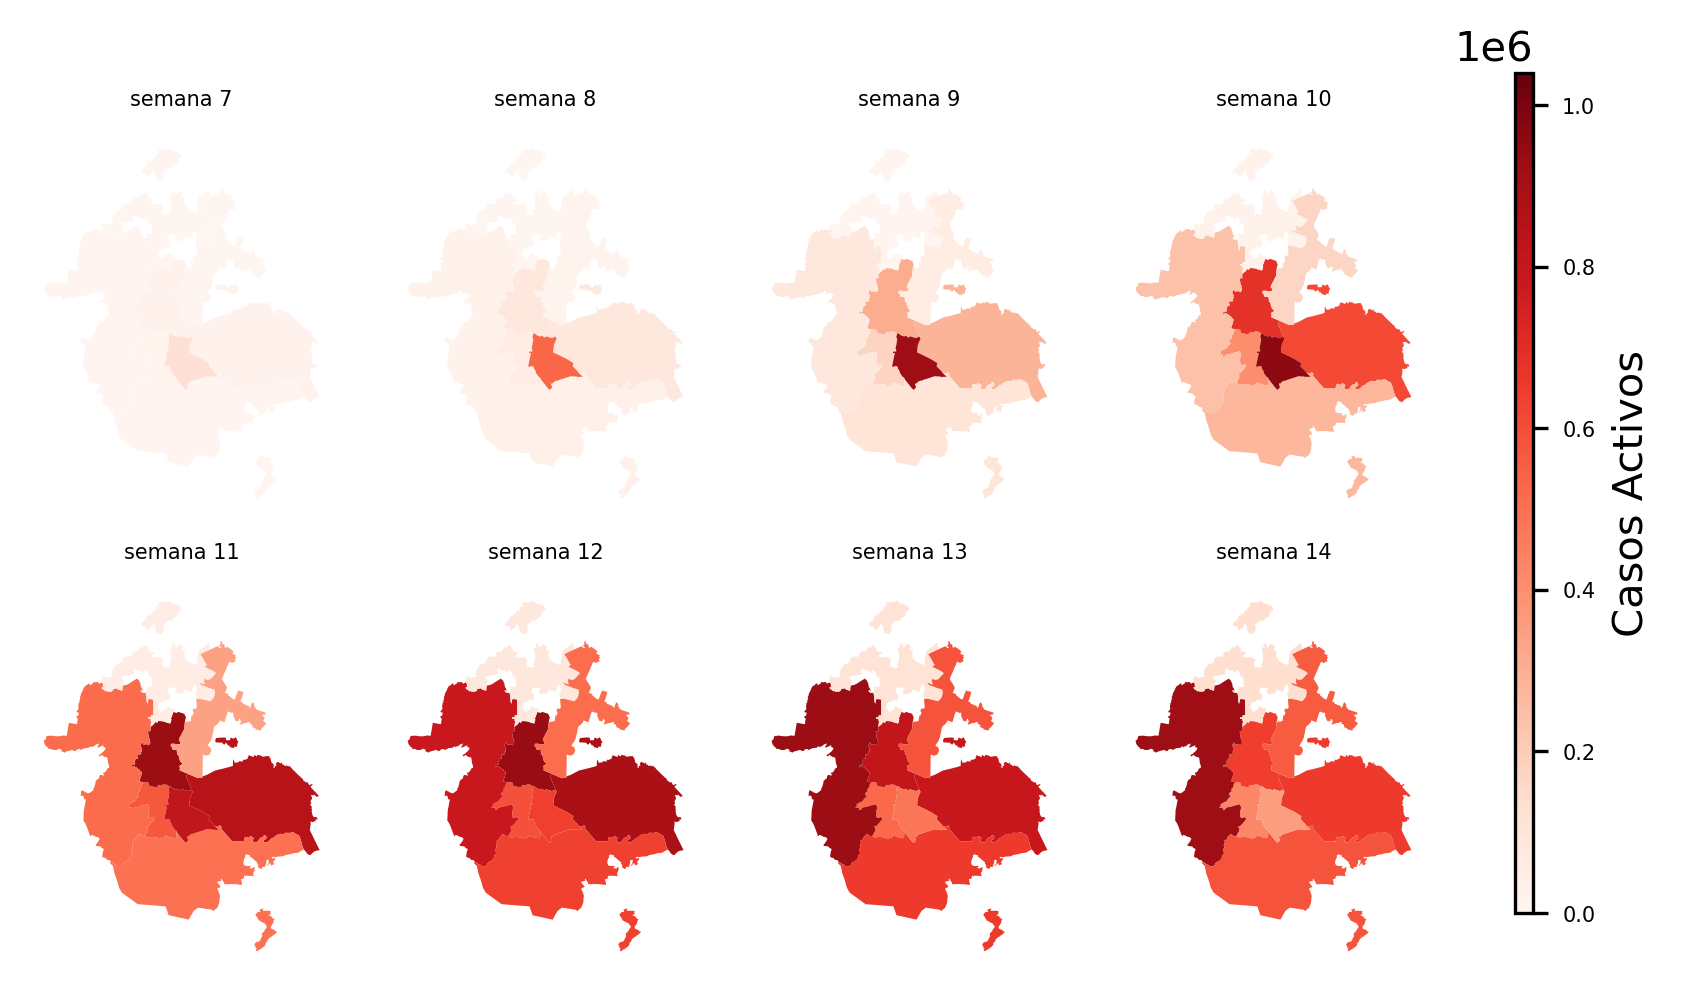

In [134]:
fig, ax = plt.subplots(2, 4, dpi = 300)
vmax = 1040000
vmin = 0

semana = 7
for i in range(2):
    for j in range(4):
        s = 'semana_{}'.format(semana)
        semana += 1
        merged.plot(s, ax = ax[i, j], cmap = 'Reds', norm=plt.Normalize(vmin = vmin, vmax = vmax))
        ax[i, j].set_title(s.replace('_', ' '), fontsize = 5)
        ax[i, j].axis('off')

cax = fig.add_axes([0.95, 0.2, 0.01, 0.7])
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin = vmin, vmax = vmax))
# fake up the array of the scalar mappable. Urgh...
sm._A = []
cb = fig.colorbar(sm, cax=cax, label = 'Casos Activos')
cb.ax.tick_params(labelsize=5)

plt.subplots_adjust(hspace = 0)
plt.show()